<a href="https://colab.research.google.com/github/msribeiror29/Analyzing-Data-Case-I/blob/main/CaseI_StoreRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please take note of the following text:

#Analyzing Data: Case I

The retail dataset I have contains sales information from a virtual store that operates nationwide. This store sells products from various departments and operates through different sales channels, including marketplaces and its own store.

The goal is to create metrics and KPIs for the retail store by combining and processing two databases: sales and customer data. This will involve concepts such as joining tables, combining datasets, data visualization, and making business assumptions.

#Assumptions / Metrics:
Based on the context and established business assumptions, the following metrics can be evaluated:

1. Best selling department.
2. Average shipping prices by department.
3. Quantity of sales per month.
4. Average income for each sales channel type.
5. Average age of customers per brand.
6. System error: For purchases made without a state code (UF), consider the status as MS.
7. Prices cannot be higher than the shipping price.

In [1]:
import pandas as pd
import seaborn as sns

###First analysis of the sales data.


In [5]:
varejo = pd.read_excel("/content/varejo.xlsx")
varejo.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


###We are analyzing the information within this data frame.

###There are null data in the Prices and Status categories.

In [6]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


###We are analyzing the data within each category.

###The App and Applications categories are the same thing.

In [7]:
varejo.groupby('idcanalvenda').idcompra.unique()

idcanalvenda
APP           [440055, 82755, 102505, 108780, 116300, 158685...
Aplicativo    [140545, 207490, 232850, 260455, 12385, 26680,...
Internet      [456225, 464255, 39780, 192920, 207505, 242655...
Mobile        [393835, 411885, 437305, 455795, 75525, 117560...
Name: idcompra, dtype: object

In [8]:
varejo['idcanalvenda'] = varejo['idcanalvenda'].str.replace('APP','Aplicativo')
varejo.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [9]:
varejo.groupby('bandeira').idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [10]:
varejo.groupby('estado').idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [11]:
varejo.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

###I will correct the categories by removing any spaces between words in the Department_Name.

In [12]:
varejo ['Nome_Departamento'] = varejo ['Nome_Departamento'].str.replace(' ','_')
varejo.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

###Null handling.



In [13]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [14]:
varejo[varejo['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


###Based on the premises outlined in the introduction, null data will need to be treated, not deleted. Similarly, we will begin with the assumption of a system error. For the "State without UF" category, consider the state of MS.

In [15]:
varejo['estado'].fillna('MS', inplace = True)
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


###Remember: "Null data for price only. Replace null values with the mean."

In [16]:
media_preco = varejo['Preço'].mean()
varejo['Preço'].fillna(media_preco, inplace = True)

In [17]:
media_preco

906.5891285439033

In [18]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


###Replace the missing values with the median.

In [ ]:
#media_preco = varejo['Preço'].median()
#media_preco

###Filtering the data, exploring the columns, and analyzing the data.



In [19]:
varejo.head(10)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742
6,464255,Internet,A,2023-01-02,599.200,599.200,Eletrodomesticos,SP,5604
7,39780,Internet,B,2023-04-29,352.080,352.080,Acessorios_e_Inovacoes,BA,9098
8,75525,Mobile,B,2023-02-19,679.200,695.120,Moveis,SP,3442
9,82755,Aplicativo,B,2023-02-09,179.928,179.928,Beleza_e_Saude,SP,7026


In [20]:
varejo[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


###I noticed that there is a standard deviation greater than the average, indicating a large spread of values between the minimum and maximum data points. As a result, it is essential to ensure that prices do not exceed shipping costs. that prices cannot be higher than shipping prices.

###Creating a rule to delete prices that are higher than the shipping price.


In [21]:
err_pr = varejo.query ('Preço > Preço_com_frete')

salles_right= varejo.query ('Preço < Preço_com_frete')

###Using the premise "right_pr = retail.query('Price < Price_with_shipping')" as the main basis.

In [22]:
salles_right.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


### Salles_right is our correct basis because we filter the data based on the location, and prices cannot be higher than the shipping price.

In [23]:
salles_right.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


###Let's analyze the category of department_name.

In [ ]:
#salles_right.query("Nome_Departamento == 'Esporte_e_lazer' and estado == 'SP'").describe()

###Best-selling department.

In [24]:
salles_right.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


###Average shipping prices by department.

In [25]:
round(salles_right.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


###Qt of sales per month.
###NOTE - this premise must be grouped by month, so we created a month column within the dataset.

In [26]:
salles_right.groupby('Data').idcompra.nunique().sort_values(ascending = False)

Data
2023-02-13    226
2023-01-20    218
2023-03-07    215
2023-03-30    214
2023-02-20    214
             ... 
2023-02-15    162
2023-04-04    162
2023-02-25    161
2023-02-22    156
2023-02-12    152
Name: idcompra, Length: 119, dtype: int64

In [27]:
salles_right['Mês'] = salles_right['Data'].dt.month
salles_right.head()

<ipython-input-27-45364921c17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salles_right['Mês'] = salles_right['Data'].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [28]:
salles_right.groupby('Mês').idcompra.nunique().sort_values(ascending = False)

Mês
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

##Merging Databases.

###Performing a join using the client table.

###Now that we comprehend the structure of both bases, we can merge them to enhance the analysis.


In [29]:
client = pd.read_excel('/content/cliente_varejo.xlsx')
client.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [30]:
salles_right.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


###Observing the two tables, we can see that they are connected through the cliente_log column, where we will perform the join.

##Analyzing the client table.

In [31]:
client[['idade', 'renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [32]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [33]:
client = client.astype({'renda':float})
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [34]:
salles_client = salles_right.merge(client, how='left', on= 'cliente_Log')
salles_client.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


###Here's a reminder of the information:

We now have a unified database containing both sales and customer information.

Calculation of Metrics:
Now that the data has been processed and unified, we can begin analyzing and calculating the following metrics:
- Average sales per month
- Percentage of sales by channel
- Average income per channel
- Average age per category

###We will use group by, aggregations, and simple Pandas manipulations.


###Average income for each type of sales channel.

In [35]:
agg_id_income = round( salles_client.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_id_income

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


###Average age of customers per brand.




In [36]:
agg_id_bandeira = round(salles_client.groupby('bandeira')['idade'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_id_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


##Data Visualization

Now, to present the results more effectively, we can create visualizations and graphs using libraries such as Matplotlib and Seaborn.


In [37]:
import matplotlib.pyplot as plt

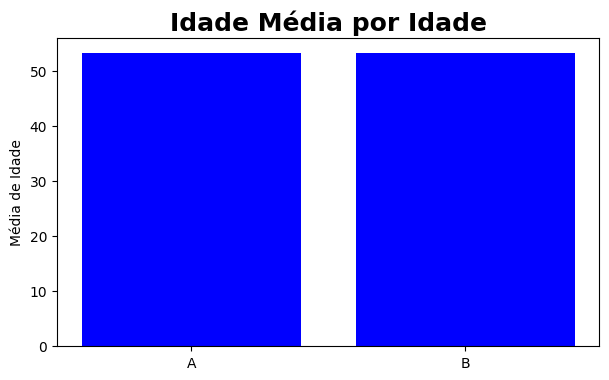

In [38]:
fig = plt.figure(figsize = (7,4))
plt.bar (agg_id_bandeira ['bandeira'], agg_id_bandeira['idade'], color = 'blue')
plt.ylabel ('Média de Idade')
plt.title ('Idade Média por Idade', loc ='center', fontsize = '18', fontweight = 'bold', color = 'black');

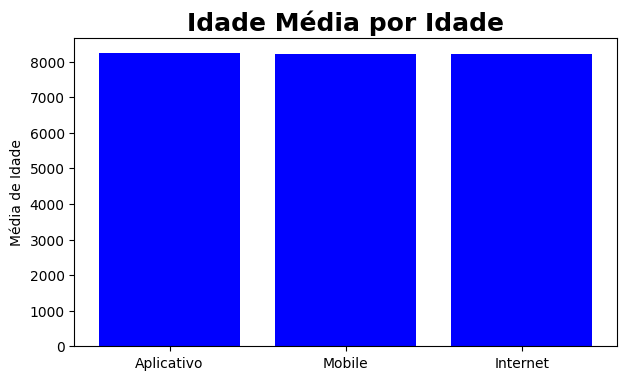

In [39]:
fig = plt.figure(figsize = (7,4))
plt.bar (agg_id_income ['idcanalvenda'], agg_id_income['renda'], color = 'blue')
plt.ylabel ('Média de Idade')
plt.title ('Idade Média por Idade', loc ='center', fontsize = '18', fontweight = 'bold', color = 'black');

###Sure! Here's a clearer version of the text: "Showing how values change over time."

In [40]:
salles_date = salles_right.groupby('Data').idcompra.nunique().reset_index()
salles_date

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


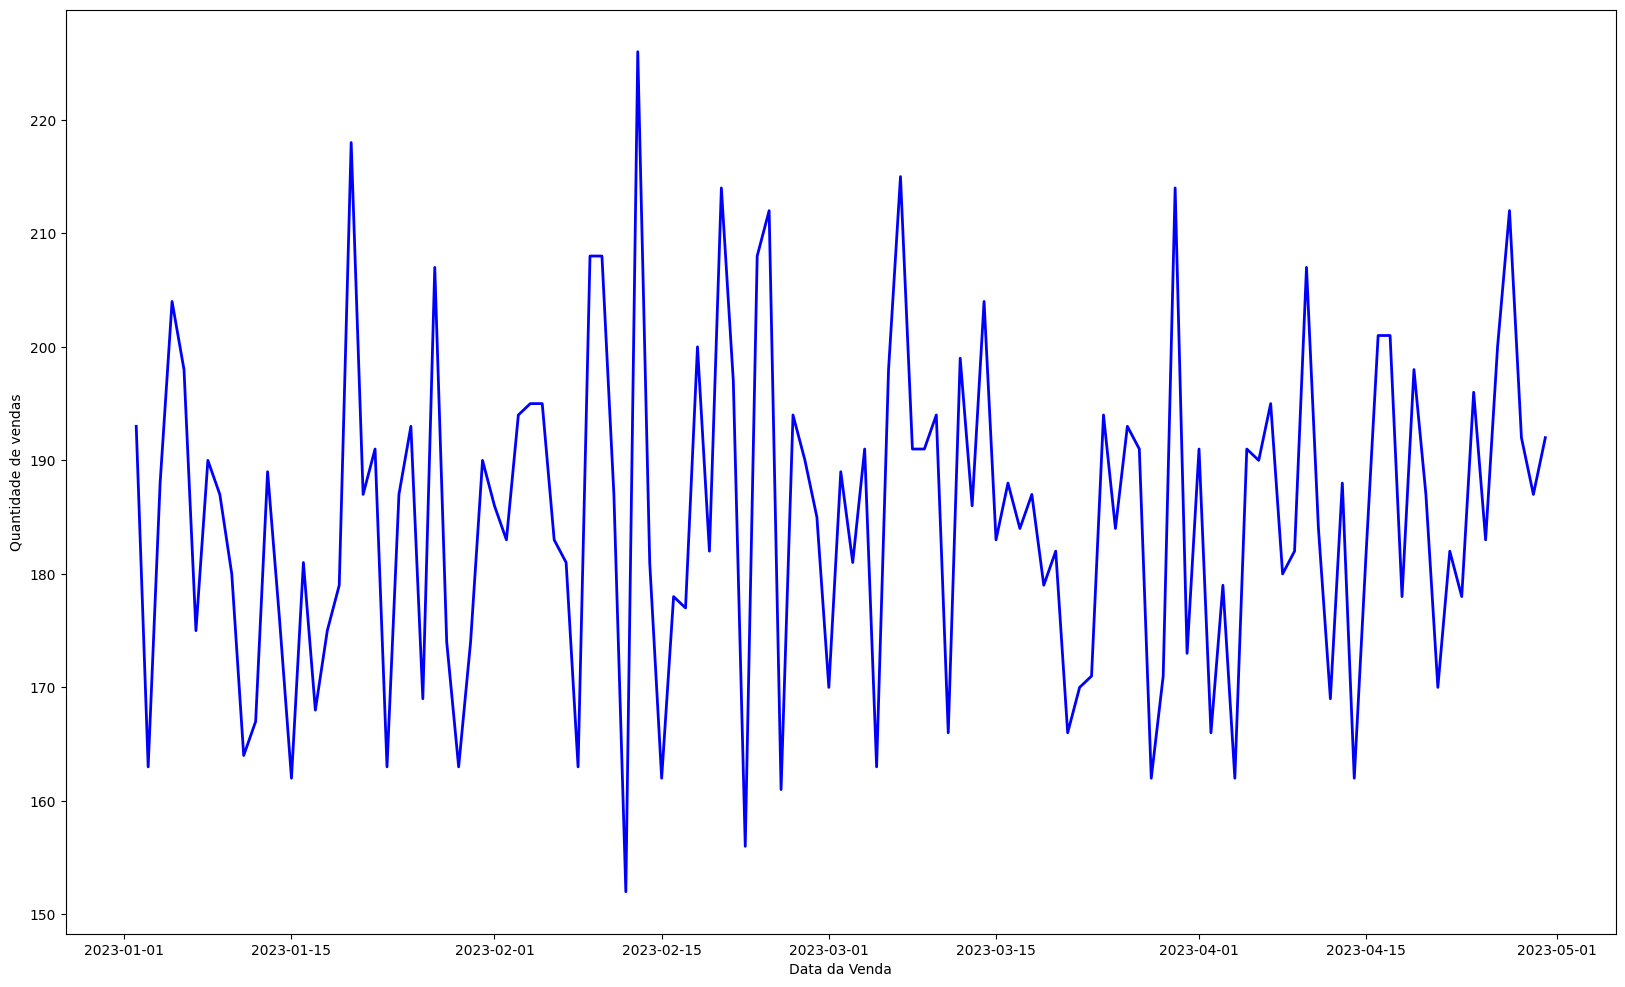

In [41]:
fig = plt.figure(figsize = (20,12))

plt.xlabel('Data da Venda')
plt.ylabel('Quantidade de vendas')
x = salles_date ['Data']
y = salles_date ['idcompra']

plt.plot(x,y, color = 'blue', linewidth = '2')
plt.show()

###View the average sales price including shipping.

In [42]:
agg_dep_price = round(salles_right.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_dep_price

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


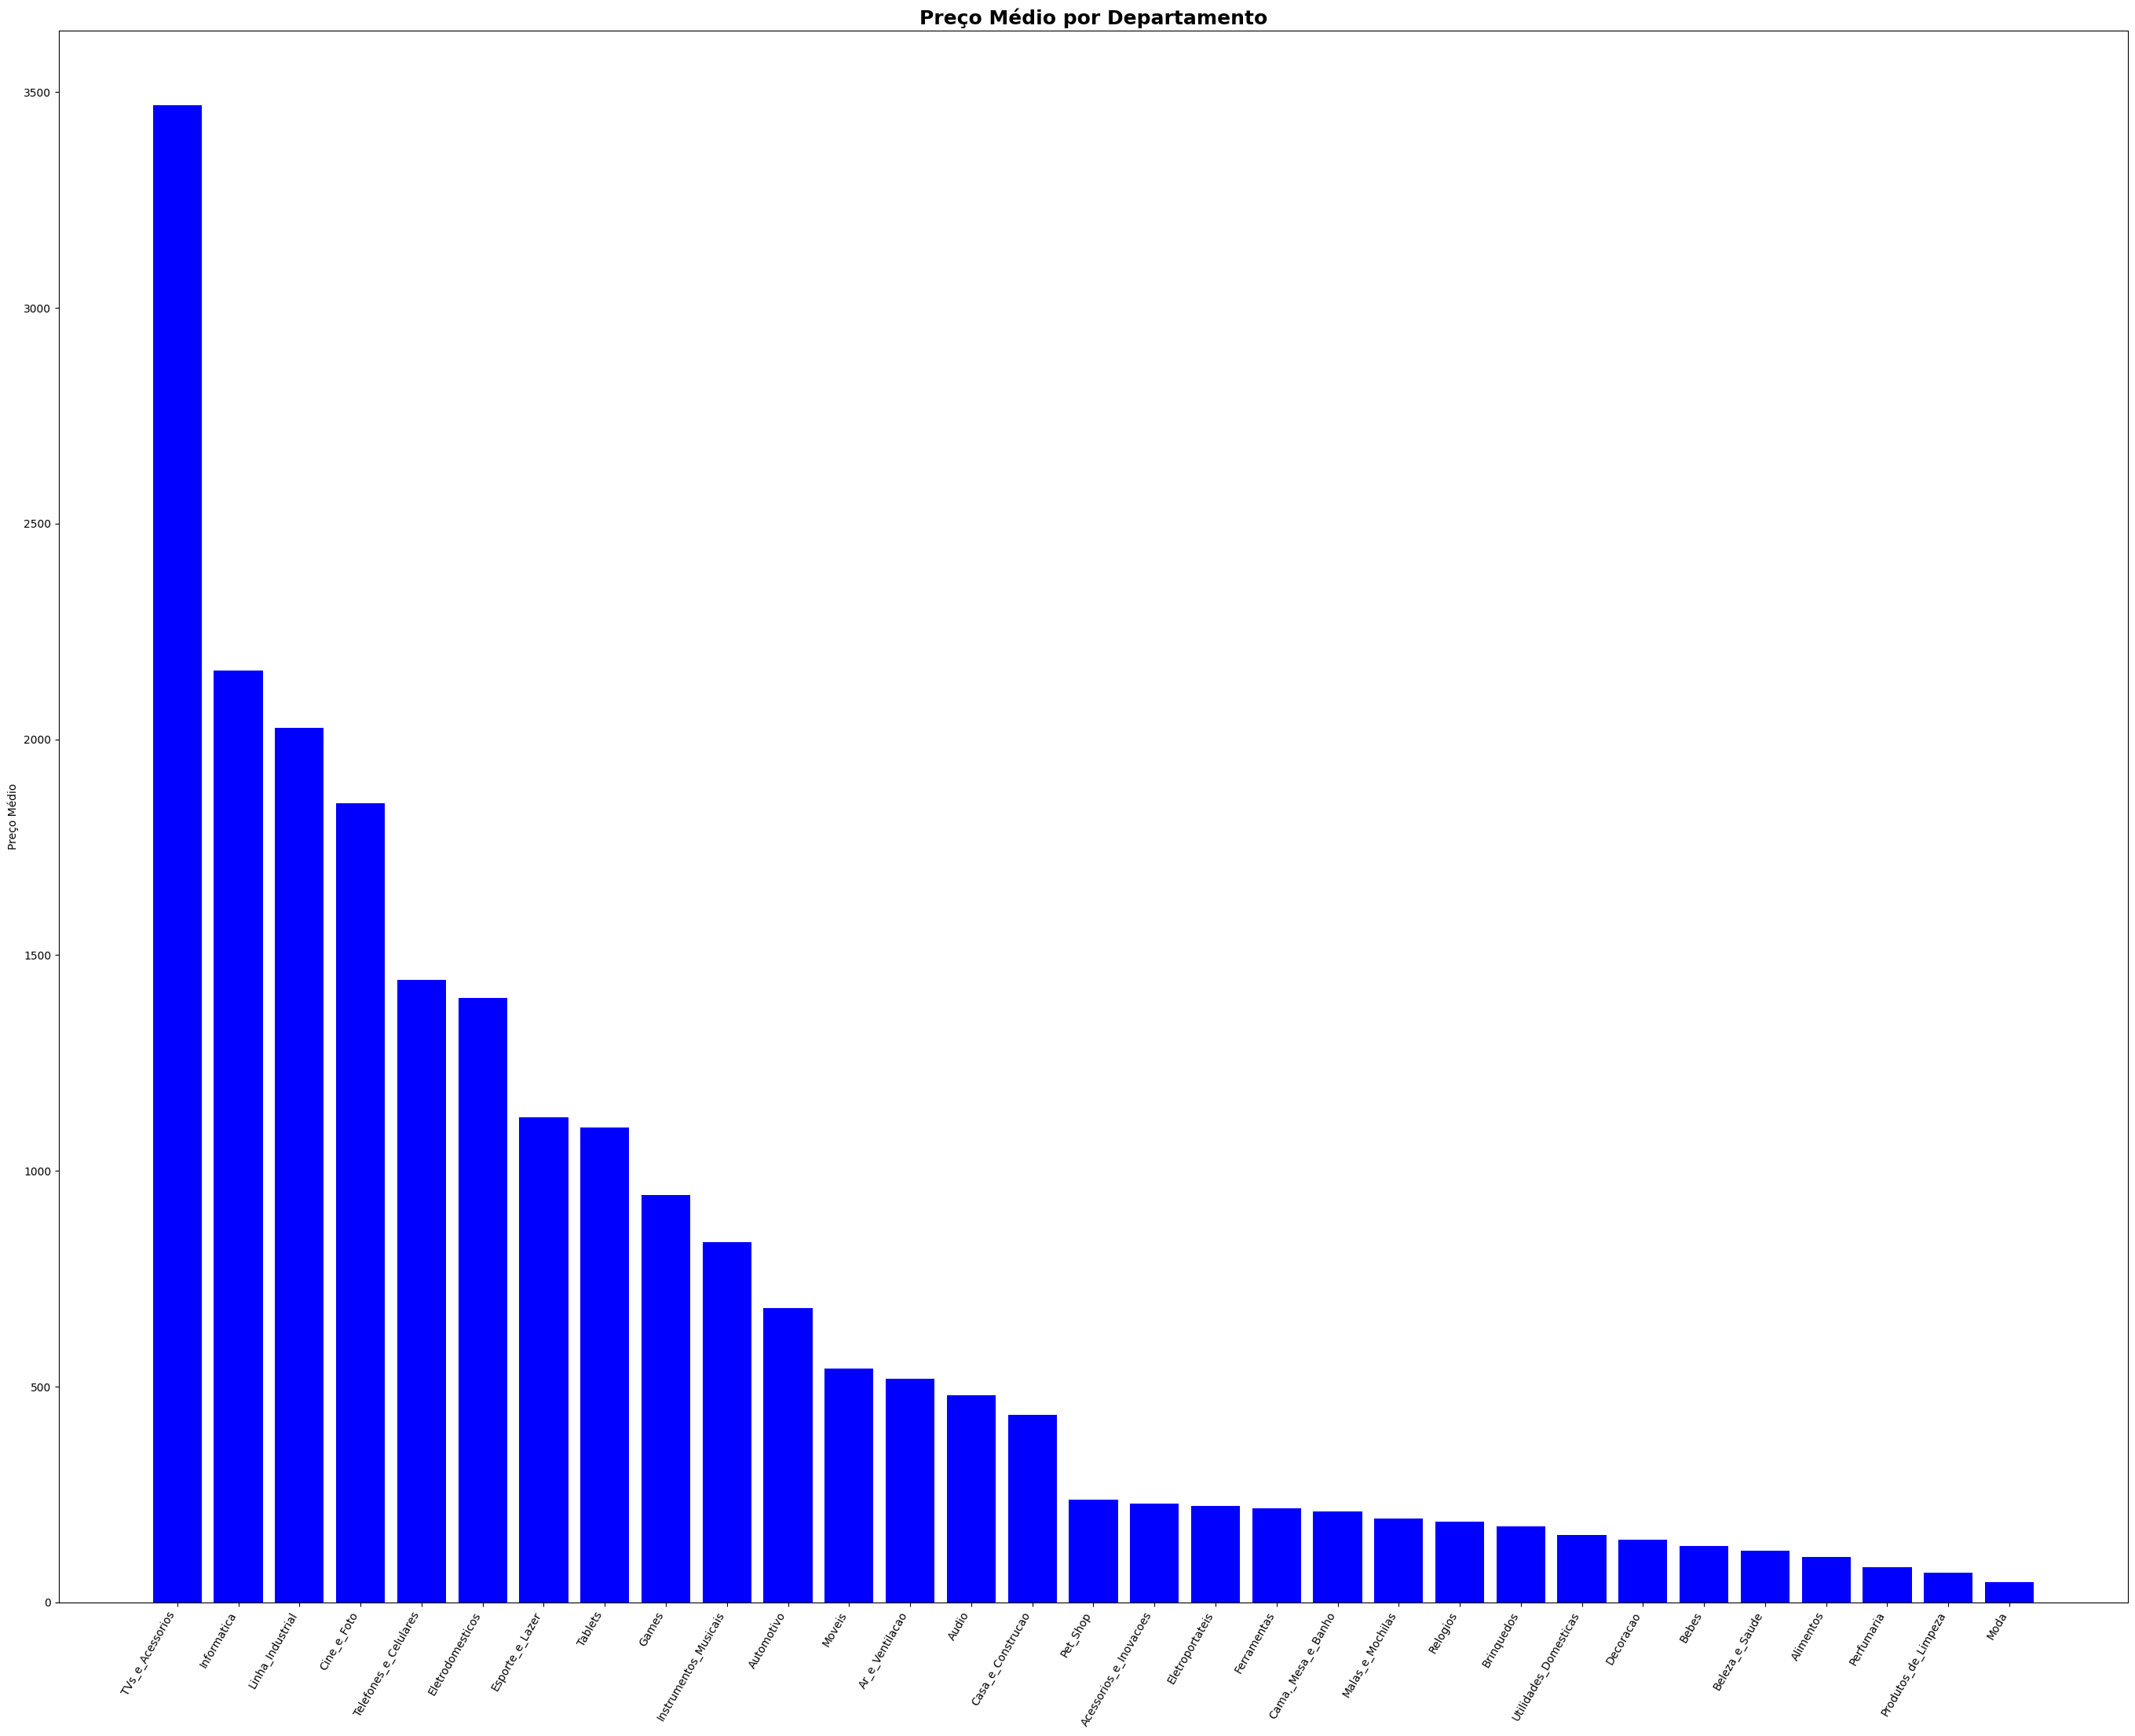

In [43]:
fig = plt.figure(figsize = (34,26))
plt.bar (agg_dep_price ['Nome_Departamento'], agg_dep_price['Preço_com_frete'], color = 'blue')
plt.ylabel ('Preço Médio')
plt.title ('Preço Médio por Departamento', loc ='center', fontsize = '18', fontweight = 'bold', color = 'black');
plt.xticks(rotation = 60, ha='right');

In [44]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.5 MB/s eta 0:00:00


In [45]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px


In [46]:
px.bar (agg_id_bandeira, x = 'bandeira', y = 'idade')

In [47]:
px.line(salles_date, x = 'Data', y = 'idcompra')

In [48]:
px.bar(agg_dep_price, x = 'Nome_Departamento', y = 'Preço_com_frete')